In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_normal_dist(center1=0.0, center2=100.0, left=-4, right=120):
    width = (right - left)
    num_grids = 10**5
    diff = width / num_grids
    pos = [left + diff * i for i in range(num_grids)]
    norm = np.sqrt(2 * np.pi) * 2
    normal = [1.0/norm*(np.exp(-0.5 * (left + diff * i - center1)**2) + np.exp(-0.5 * (left + diff * i - center2)**2)) for i in range(num_grids)]
    return pos, normal

In [3]:
def do_MCMC(niter=10**7, x=0.0, seed=1111):
    naccept = 0
    data = []
    np.random.seed(seed)
    for i in range(niter):
        if i % 2 == 0:
            step_left = -1
            step_right = 1
        else:
            step_left = -100
            step_right = 100
        backup_x = x
        action_init = -np.log(np.exp(-0.5*x**2) + np.exp(-0.5*(x-100)**2))
        # dx in [step_left, step_right]
        dx = (step_right - step_left) * np.random.rand() + step_left
        x += dx
        action_fin = -np.log(np.exp(-0.5*x**2) + np.exp(-0.5*(x-100)**2))
        if np.exp(action_init - action_fin) > np.random.rand():
            # accept
            naccept += 1
        else:
            x = backup_x
        data.append(x)
    return data

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


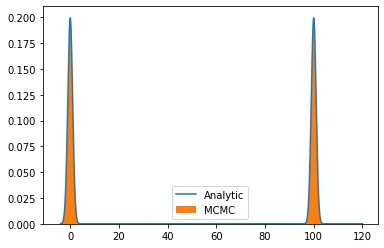

In [6]:
data = do_MCMC()
pos, normal = get_normal_dist()
plt.plot(pos, normal, label='Analytic')
plt.hist(data, bins=1000, density=True, label='MCMC')
plt.legend()
plt.savefig('./fig/practice4_2_iter10_7.jpg')
plt.show()